In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns


In [4]:
data=pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
x=data.drop('target',axis=1)
y=data['target']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [7]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9902597402597403
[[159   0]
 [  3 146]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [8]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance

,0
cp,0.132098
ca,0.127784
thal,0.125948
thalach,0.118100
oldpeak,0.110975
age,0.086900
chol,0.077313
trestbps,0.071897
slope,0.053614
exang,0.040124


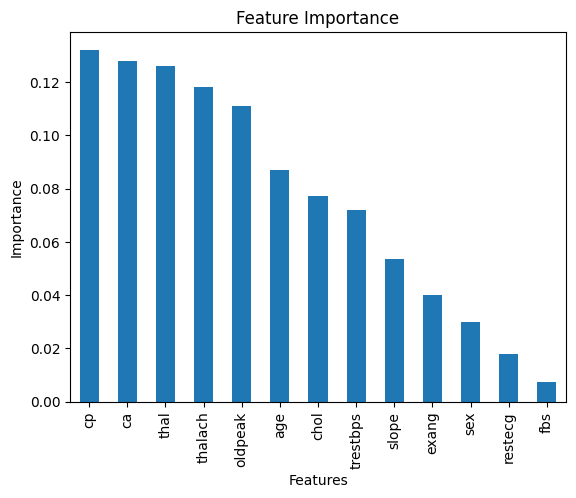

In [9]:
feature_importance=pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar',title='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [10]:
clf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
clf.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [11]:
!pip install graphviz==0.20.1

In [12]:
!apt install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp311-cp311-linux_x86_64.whl size=169679 sha256=d6ee40290dc6b64fbb312cf235a8a45160aa6e44fb8629b594e052d3b0d2dc2c
  Stored in directory: /root/.cache/pip/wheels/9c/5f/df/6fffd2a4353f26dbb0e3672a1baf070c124a1d74a5f9318279
Successfully built pygraphviz


In [13]:
from sklearn.tree import export_graphviz
import graphviz

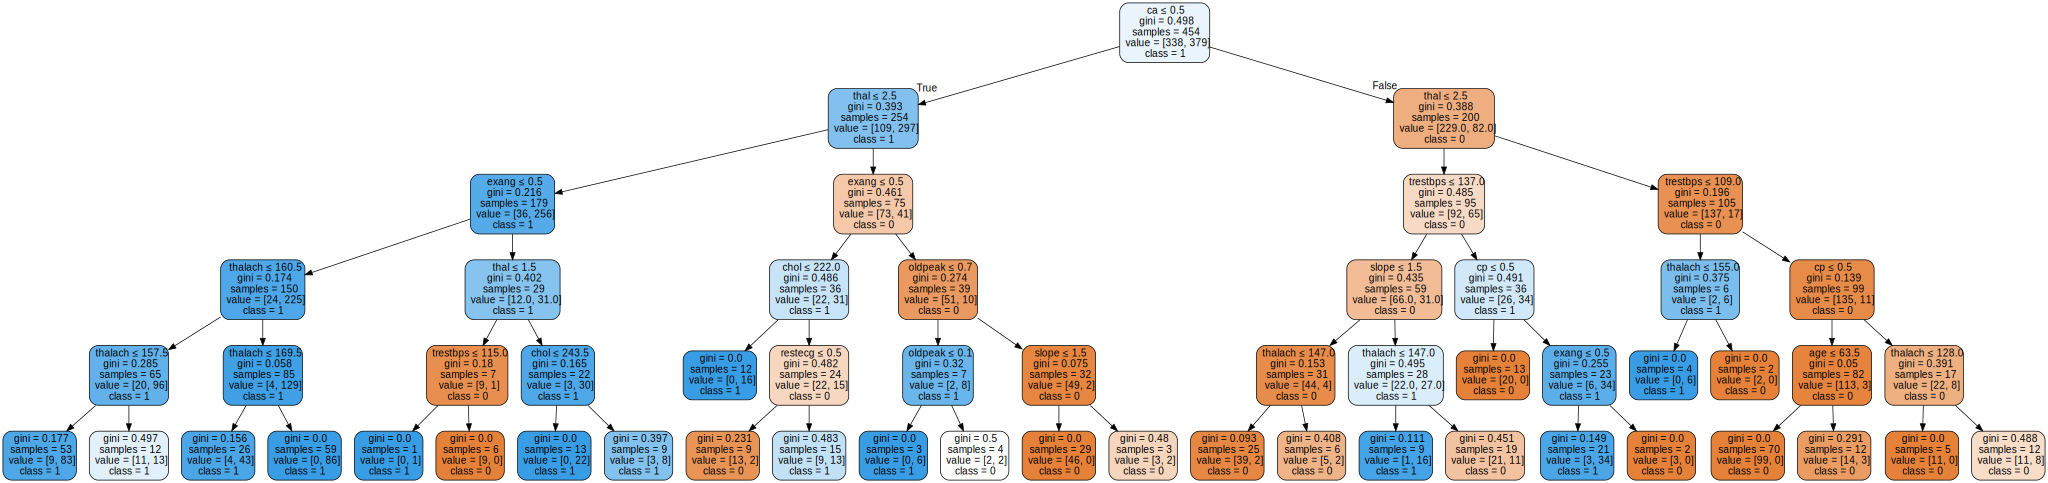

In [14]:
tree=clf.estimators_[0]
dot_data=export_graphviz(tree,out_file=None,feature_names=x.columns,class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph.render('heart_disease_tree')
graph

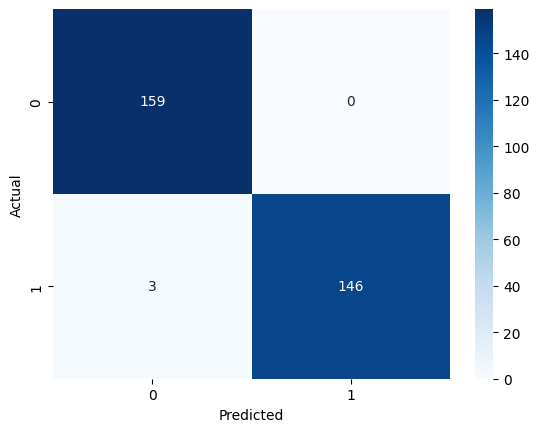

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()